# 实验：模型效果评估  

### 实验目标：掌握ROC和KS曲线的绘制，以及AUC、KS指标在模型评估场景中的应用

## 1. ROC曲线绘制  
如果把假警报率理解为代价的话，那么命中率就是收益，所以也可以说在阈值相同的情况下，希望假警报率（代价）尽可能小，命中率（收益）尽可能高，该思想反映在图形上就是ROC曲线尽可能地陡峭。曲线越靠近左上角，说明在相同的阈值条件下，命中率越高，假警报率越低，模型越完善。  

![Image Name](https://cdn.kesci.com/upload/image/rd4boyim29.png?imageView2/0/w/960/h/960)  


In [22]:
# 股票客户流失预警模型
import warnings
warnings.filterwarnings('ignore')

# 1.读取数据
import pandas as pd
df = pd.read_excel('股票客户流失.xlsx')

# 2.划分特征变量和目标变量
X = df.iloc[:,0:5]
y = df.iloc[:,-1]

# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4.模型搭建 - 逻辑回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train )

# 5.模型使用1 - 预测数据结果
y_pred = model.predict(X_test)
print(y_pred[0:100])  # 打印预测内容的前100个看看

# 查看全部的预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred )
print(score)  # 打印整体的预测准确度

# 6.模型使用2 - 预测概率
y_pred_proba = model.predict_proba(X_test)  
print(y_pred_proba[0:5])  # 打印前5个客户的分类概率

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1]
0.7977288857345636
[[0.82041491 0.17958509]
 [0.84029613 0.15970387]
 [0.79819342 0.20180658]
 [0.62989192 0.37010808]
 [0.61636611 0.38363389]]


In [23]:
#混淆矩阵的Python代码实现
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pred )  # 传入预测值和真实值
print(m)

[[968  93]
 [192 156]]


m的打印结果是一个2行2列的二维数组，其中第1行为实际分类为0的数量，第2行为实际分类为1的数量；第1列为预测分类为0的数量，第2列为预测分类为1的数量。可以通过如下代码为表格添加行列索引。

In [13]:
import pandas as pd

a = pd.DataFrame(m, index=['0（实际不流失）', '1（实际流失）'], columns=['0（预测不流失）', '1（预测流失）'])
a

,0（预测不流失）,1（预测流失）
0（实际不流失）,968,93
1（实际流失）,192,156


In [14]:
#计算命中率
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.63      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409


### 1.1 计算必要参数  
计算ROC曲线需要的假警报率（fpr）、命中率（tpr）及阈值（thres）

In [24]:
# 计算ROC曲线需要的假警报率（fpr）、命中率（tpr）及阈值（thres）
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(y_test,y_pred_proba[:,1] )

In [20]:
# 感兴趣的同学可以查看下roc_curve()函数返回的内容
print(roc_curve(y_test, y_pred_proba[:,1]))
type(roc_curve(y_test, y_pred_proba[:,1]))
len(roc_curve(y_test, y_pred_proba[:,1]))

(array([0.        , 0.        , 0.        , 0.00188501, 0.00188501,
       0.00282752, 0.00282752, 0.00377003, 0.00377003, 0.00565504,
       0.00565504, 0.00659755, 0.00659755, 0.00754006, 0.00754006,
       0.00848256, 0.00848256, 0.01036758, 0.01036758, 0.01131008,
       0.01131008, 0.01225259, 0.01225259, 0.0131951 , 0.0131951 ,
       0.01508011, 0.01508011, 0.01602262, 0.01602262, 0.01696513,
       0.01696513, 0.01885014, 0.01885014, 0.02073516, 0.02073516,
       0.02356268, 0.02356268, 0.0273327 , 0.0273327 , 0.02827521,
       0.02827521, 0.02921772, 0.02921772, 0.03016023, 0.03016023,
       0.03110273, 0.03110273, 0.03204524, 0.03204524, 0.03298775,
       0.03298775, 0.03393025, 0.03393025, 0.03487276, 0.03487276,
       0.03581527, 0.03581527, 0.03675778, 0.03675778, 0.03770028,
       0.03770028, 0.03864279, 0.03864279, 0.0395853 , 0.0395853 ,
       0.04241282, 0.04241282, 0.04335533, 0.04335533, 0.04429783,
       0.04429783, 0.04712535, 0.04712535, 0.04901037, 0.0490

3

### 1.2 查看参数

In [19]:
# 查看假警报率（fpr）、命中率（tpr）及阈值（thres）
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head()

,阈值,假警报率,命中率
0,inf,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230


### 1.3 绘制ROC曲线

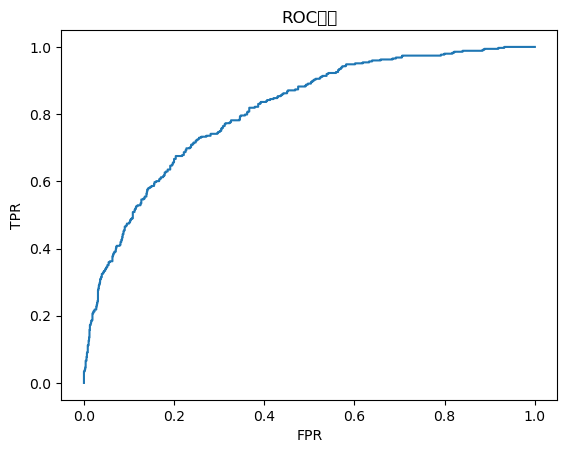

In [25]:
# 绘制ROC曲线
import matplotlib.pyplot as plt

plt.plot(fpr,tpr )  # 通过plot()函数绘制折线图
plt.title('ROC曲线')  # 添加标题，中文显示可能会有问题
plt.xlabel('FPR')  # 添加X轴标签
plt.ylabel('TPR')  # 添加Y轴标
plt.show()

### 1.4 计算AUC值  
AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。AUC越接近1.0，检测方法真实性越高;等于0.5时，则真实性最低，无应用价值。结果为0.81，可见模型预测效果还是不错。

In [27]:
# 求出模型的AUC值
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test,y_pred_proba[:,1])
score

0.8103854528908967

**补充知识点：对阈值取值的理解**

In [28]:
max(y_pred_proba[:,1])

0.9303686064504135

In [29]:
a = pd.DataFrame(y_pred_proba, columns=['分类为0概率', '分类为1概率'])
a = a.sort_values('分类为1概率', ascending=False)
a.head(15)

,分类为0概率,分类为1概率
326,0.069631,0.930369
366,0.085373,0.914627
662,0.092923,0.907077
1154,0.105118,0.894882
1036,0.105906,0.894094
1093,0.111303,0.888697
1164,0.115550,0.884450
891,0.116594,0.883406
437,0.123060,0.876940
1153,0.127293,0.872707


## 2. KS曲线绘制  
区别于ROC曲线将假警报率（FPR）作为横坐标，将命中率（TPR）作为纵坐标，KS曲线将阈值作为横坐标，将命中率（TPR）与假警报率（FPR）之差作为纵坐标，如下图所示。  

![Image Name](https://cdn.kesci.com/upload/image/rd4btfhjbi.png?imageView2/0/w/960/h/960)  

和ROC曲线一样，除了可视化的图形外，还需要一个可以量化的指标来衡量模型预测效果，与ROC曲线对应的是AUC值，而与KS曲线对应的则是KS值，KS值就是KS曲线的峰值。  
一般情况下，我们希望模型有较大的KS值，因为较大的KS值说明模型有较强的区分能力。不同取值范围的KS值的含义如下：  

KS值小于0.2，一般认为模型的区分能力较弱；  
KS值在[0.2，0.3]区间内，模型具有一定区分能力；  
KS值在[0.3，0.5]区间内，模型具有较强的区分能力。

### 2.1 计算必要参数

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test ,y_pred_proba[:,1] )

### 2.2 查看参数

In [31]:
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head()

,阈值,假警报率,命中率
0,inf,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230


### 2.3 绘制KS曲线

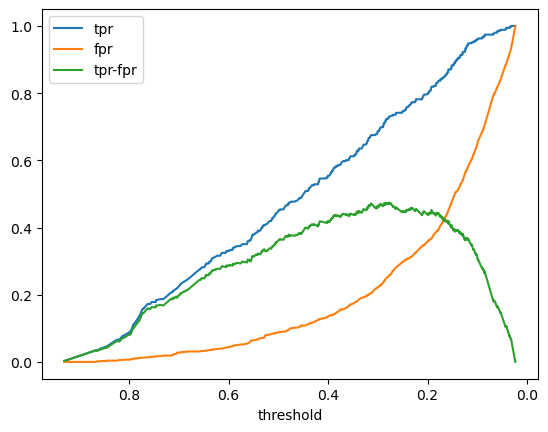

In [35]:
plt.plot(thres[1:],tpr[1:]) #tpr
plt.plot(thres[1:],fpr[1:]) #fpr
plt.plot(thres[1:],(tpr-fpr)[1:]) #tpr-fpr
plt.xlabel('threshold')
plt.legend(['tpr', 'fpr', 'tpr-fpr'])
plt.gca().invert_xaxis() 
plt.show()

### 2.4 计算KS值

In [36]:
max(tpr - fpr)

0.4744656418256471

In [37]:
# KS值对应的阈值
a['TPR-FPR'] = a['命中率'] - a['假警报率']
a.head()

,阈值,假警报率,命中率,TPR-FPR
0,inf,0.000000,0.000000,0.000000
1,0.930369,0.000000,0.002874,0.002874
2,0.867342,0.000000,0.034483,0.034483
3,0.864187,0.001885,0.034483,0.032598
4,0.857303,0.001885,0.040230,0.038345


In [38]:
# 另外一种获取KS值的方式
max(a['TPR-FPR'])

0.4744656418256471

In [39]:
# 获取KS值对应的阈值等信息
a[a['TPR-FPR'] == max(a['TPR-FPR'])]

,阈值,假警报率,命中率,TPR-FPR
224,0.27769,0.255419,0.729885,0.474466
